In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.model_selection import ShuffleSplit
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import random
import sys
import os
import shapefile   
import geopandas as gpd
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
import cv2
from keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
map = shapefile.Reader(r"C:\Users\PC\Desktop\ShapeDetectOnShapefile\shp\ashkal.shp")
txt_shapes = []
for mapshape in map.shapes():
    #print(mapshape)
    listx=[]
    listy=[]   
    for x,y in mapshape.points:
        listx.append(x)
        listy.append(y)
    txt_shapes.append([listx,listy])

1


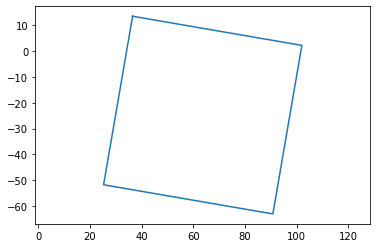

2


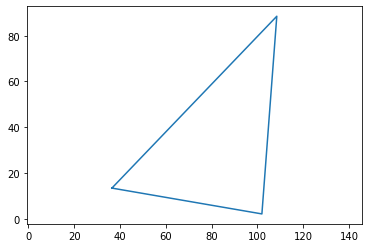

3


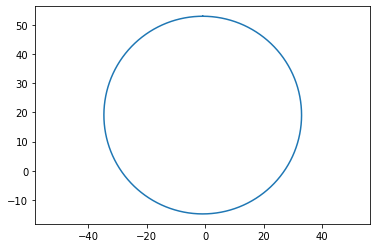

In [3]:
df = gpd.read_file(r'C:\Users\PC\Desktop\ShapeDetectOnShapefile\shp\ashkal.shp')
#df.head()
img_path=r'C:\Users\PC\Desktop\ShapeDetectOnShapefile\roomShape\\'
count=0
#for mapshape in range(len(df["geometry"])):
#    print(df["OBJECTID"][mapshape])
fmt=".jpg"
for zone in txt_shapes:
    #print(zone)
    VAR=df.Id[count]
    #df.Id[fieldObjectId]
    print(VAR)
    
    x,y = zone
    plt.plot(x,y)
    plt.axis('equal')
    plt.savefig(f"{img_path}{VAR}{fmt}")
    plt.show()
    count+=1
    #plt.savefig('test.png')

In [4]:
ROOT_dir = "./2750/"
folders = os.listdir(ROOT_dir)
len_of_images = []
for i in folders:
    file_path = os.listdir("{}/{}".format(ROOT_dir,i))
    len_of_images.append(len(file_path))
   # print(f"{i}:{len(file_path)} files")
TRAIN_DIR = './training'
TEST_DIR = './testing'
BATCH_SIZE = 128
NUM_CLASSES=len(folders)
INPUT_SHAPE = (64,64, 3)
CLASS_MODE = 'categorical'
for path in [TRAIN_DIR,TEST_DIR]:
    if not os.path.exists(path):
        os.mkdir(path)
        
for subfolder in folders:
    if not os.path.exists(os.path.join(TRAIN_DIR,subfolder)):
        os.mkdir(os.path.join(TRAIN_DIR,subfolder))

    if not os.path.exists(os.path.join(TEST_DIR, subfolder)):
        os.mkdir(os.path.join(TEST_DIR, subfolder))
        
                
train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_DIR,
  validation_split=0.1,
  subset="training",
  seed=42,
  image_size=(64,64),
  batch_size=BATCH_SIZE)

Found 2000 files belonging to 5 classes.
Using 1800 files for training.


In [5]:
room_dis = int(input())

0


In [6]:
type(room_dis)

int

In [7]:
if room_dis == 0: #Circle
    varRoom = 0
elif room_dis == 1: #Hexagon
    varRoom = 1
elif room_dis == 2: #Pentagon    
    varRoom = 2
elif room_dis == 3: #Square    
    varRoom = 3
elif room_dis == 4: #Triangle    
    varRoom = 4
else:
    varRoom = 3

In [8]:
varRoom

0

In [9]:
model = load_model(r'C:\Users\PC\Desktop\ShapeDetectOnShapefile\M_P__Model.hdf5')

In [10]:
class_names = train_ds.class_names
class_names

['Circle', 'Hexagon', 'Pentagon', 'Square', 'Triangle']

In [11]:
roomShape_directory = r"C:\Users\PC\Desktop\ShapeDetectOnShapefile\roomShape"
# Start the loop
VarRoomShape = 9999
for folder, sub_folders, files in os.walk(roomShape_directory):
       for special_file in files:
            
              file_path = os.path.join(folder, special_file)
              print(special_file[:-4])
              imageF = image.load_img(file_path, target_size=(256,256))
              img_array = image.img_to_array(imageF)
              img_batch = np.expand_dims(img_array, axis=0)
              prediction = model.predict(img_batch)
              print(np.argmax(prediction))
              print(class_names[np.argmax(prediction)])
              VarRoomShape = int(np.argmax(prediction)) 
            
              if VarRoomShape==varRoom:
                fieldObjectId = int(special_file[:-4])
                print("ok")
                break
              else:
                continue
            

1
1/1 [==============================] - 0s 110ms/step
3
Square
2
1/1 [==============================] - 0s 20ms/step
3
Square
3
1/1 [==============================] - 0s 19ms/step
0
Circle
ok


In [12]:
fieldObjectId

3

In [13]:
select_rows = df.Id[fieldObjectId-1]
df1 = gpd.read_file(r'C:\Users\PC\Desktop\ShapeDetectOnShapefile\shp\ashkal.shp')
df1


,Id,geometry
0,1,"POLYGON ((36.46786 13.44765, 101.97092 2.16898..."
1,2,"POLYGON ((36.46786 13.44765, 108.47785 88.4942..."
2,3,"POLYGON ((-0.83851 52.91744, -0.82080 52.91744..."


In [14]:
select_rows

3

<AxesSubplot:>

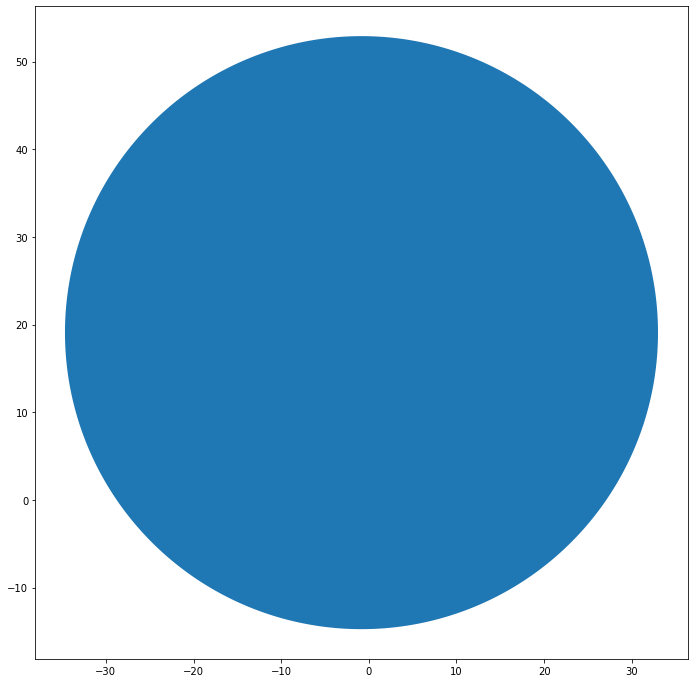

In [15]:
df1[df1['Id'] == select_rows].plot(figsize=(12, 12))